<a href="https://colab.research.google.com/github/albivaltzew/Machine_learning_DC_ITMO/blob/main/Unit_5_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Опросы

In [ ]:
import numpy as np

In [ ]:
x = [1,3,-5,7]
y = [2,-4,0,8]

Евклидово

In [ ]:
sum = 0
for i in range(len(x)):
  sum +=(x[i] - y[i])**2
dE = np.sqrt(sum)
dE

8.717797887081348

Манхэттенское

In [ ]:
sum = 0
for i in range(len(x)):
  sum +=abs(x[i] - y[i])
dM = sum
dM

14

Чебышев

In [ ]:
temp = []
for i in range(len(x)):
  temp.append(abs(x[i] - y[i]))
dCHE = max(temp)
dCHE

7

# Задание 5.4

In [ ]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("5_kNN.csv", delimiter=";",header = 0, index_col='id')
df

,X,Y,Class
id,,,
1,28,10,1
2,49,49,1
3,48,35,0
4,36,33,1
5,45,54,0


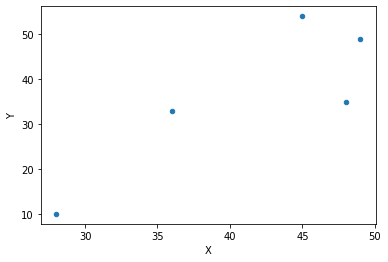

In [ ]:
df.plot(x='X', y='Y', kind='scatter')	

In [ ]:
df1 = df.drop(['Class'],axis=1)
df1

,X,Y
id,,
1,28,10
2,49,49
3,48,35
4,36,33
5,45,54


In [ ]:
data = df1.to_numpy()
data

array([[28, 10],
       [49, 49],
       [48, 35],
       [36, 33],
       [45, 54]])

In [ ]:
classes = df["Class"].to_numpy()
classes


array([1, 1, 0, 1, 0])

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# new_obj = [[39,22]]
new_obj = [[33,47]]
# dataset
X = data
target =  classes

# fit a k-nearest neighbor model to the data
K = 3
model = KNeighborsClassifier(n_neighbors = K, p = 1)
model.fit(X, target)
print(model)

# make predictions
print( '(39,22) is class'),
print( model.predict(new_obj) )


KNeighborsClassifier(n_neighbors=3, p=1)
(39,22) is class
[1]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [ ]:
K = 5
nbrs = NearestNeighbors(n_neighbors=K, p = 2, algorithm='auto').fit(data)
distances, indices = nbrs.kneighbors(new_obj)
print(distances)
print(indices)

[[13.89244399 14.31782106 16.1245155  19.20937271 37.33630941]]
[[4 3 1 2 0]]


In [ ]:
index= np.array([4, 3, 1, 2, 0])
print(index)
w = []
for i in range(len(distances[0])):
  w.append(1/distances[0,i]**2)
w = np.array(w)
print(w)

[4 3 1 2 0]
[0.00518135 0.00487805 0.00384615 0.00271003 0.00071736]


Сортировка по индексу

In [ ]:
arr1inds = index.argsort()
sorted_index = index[arr1inds[::1]]
sorted_w = w[arr1inds[::1]]
print(classes)
print(sorted_index)
print(sorted_w)

sum0 = 0 
sum1 = 0
for i in range(len(classes)):
  if classes[i] == 0:
    sum0 += sorted_w[i]
  if classes[i] == 1:
    sum1 += sorted_w[i]
print(sum0)
print(sum1)
    

[1 1 0 1 0]
[0 1 2 3 4]
[0.00071736 0.00384615 0.00271003 0.00487805 0.00518135]
0.007891374250530072
0.00944156274141927


Ближайший объект к точке и его ID

Евклид:

In [ ]:
neigh = NearestNeighbors(n_neighbors=K, p=2)
neigh.fit(data)
print(neigh.kneighbors([[33,47]]))

(array([[13.89244399, 14.31782106, 16.1245155 , 19.20937271, 37.33630941]]), array([[4, 3, 1, 2, 0]]))


Mанхеттен

In [ ]:
neigh = NearestNeighbors(n_neighbors=5, p=1)
neigh.fit(data)
print(neigh.kneighbors([[33,47]]))

(array([[17., 18., 19., 27., 42.]]), array([[3, 1, 4, 2, 0]]))


#Байес наивный 
#Задание 5.5

In [ ]:
# приз|спам
P1 = 6/24
# спам
P2 = 24/70
# приз
P3 = 11/70
# спам | приз
P = P1 * P2 / P3
P

0.5454545454545455

In [ ]:
lnPspam = np.log(11/(11+26))


Spam

In [ ]:

V = 8
r = 1
spam = 69
# win|spam
Pwinspam = (1+6)/ (V+r+spam)
print(Pwinspam)
Pdollarsspam = (1+0)/ (V+r+spam)
Pmillionspam = (1+10)/(V+r+spam)

0.08974358974358974


In [ ]:
Fspam = lnPspam + np.log(Pwinspam) + np.log(Pdollarsspam) + np.log(Pmillionspam)
print(Fspam)


-9.939343698060945


Ne Spam

In [ ]:
Pnespam = 26/(11+26)
lnPnespam = np.log(Pnespam)
nespam = 48
# win|nespam
Pwinnespam = (1+3)/ (V+r+nespam)
print(Pwinspam)
Pdollarsnespam = (1+0)/ (V+r+nespam)
Pmillionnespam = (1+5)/(V+r+nespam)

0.08974358974358974


In [ ]:
Fnespam = lnPnespam + np.log(Pwinnespam) + np.log(Pdollarsnespam) + np.log(Pmillionnespam)
print(Fnespam)


-9.303921347778447


In [ ]:
# P class|pismo
Pclasspismo = 1/ (1+ np.exp(Fnespam - Fspam))
Pclasspismo

0.3462820551258368

#Байес Task 

In [ ]:
P_spam = 14/(14+12)
V = 10
r = 2
spam = 70
# win|spam
P_gift_spam = (1+1)/ (V+r+spam)
P_purchase_spam = (1+14)/ (V+r+spam)
P_offer_spam = (1+0)/(V+r+spam)
P_access_spam = (1+5)/(V+r+spam)
P_money_spam = (1+0)/(V+r+spam)
P_million_spam = (1+2)/(V+r+spam)
P_investment_spam = (1+0)/(V+r+spam)


In [ ]:
Fspam = np.log(P_spam) + np.log(P_gift_spam)\
+np.log(P_purchase_spam) + np.log(P_offer_spam)\
+np.log(P_access_spam) + np.log(P_money_spam)\
+np.log(P_million_spam) + np.log(P_investment_spam)

        
print(Fspam)


-25.174504799697676


In [ ]:
P_nespam = 12/(14+12)
V = 10
r = 2
spam = 46
# |nespam
P_gift_nespam = (1+4)/ (V+r+spam)
P_purchase_nespam = (1+22)/ (V+r+spam)
P_offer_nespam = (1+0)/(V+r+spam)
P_access_nespam = (1+4)/(V+r+spam)
P_money_nespam = (1+1)/(V+r+spam)
P_million_nespam = (1+1)/(V+r+spam)
P_investment_nespam = (1+0)/(V+r+spam)


In [ ]:
Fnespam = np.log(P_nespam) + np.log(P_gift_nespam)\
+np.log(P_purchase_nespam) + np.log(P_offer_nespam)\
+np.log(P_access_nespam) + np.log(P_money_nespam)\
+np.log(P_million_nespam) + np.log(P_investment_nespam)

        
print(Fnespam)


-21.455626560141177


In [ ]:
# P class|pismo
Pclasspismo = 1/ (1+ np.exp(Fnespam - Fspam))
Pclasspismo

0.023686505520132066

##Unit 6 ЛогРегрессия

In [ ]:
odds = 0.75/(1 - 0.75)
odds

3.0

In [ ]:
t0 = -0.046
t1 = 0.541
t2 = -0.014
t3 = -0.132
x1 = 4
x2 = 40
x3 = 8
P = 1/(1+np.exp(-(t0 + t1 *x1 + t2*x2 + t3*x3)))
P

0.6229292233842624

In [ ]:
t0 = -2.992
t1 = 0.240
t2 = 1.102
x1 = 0
x2 = 0

P = 1/(1+np.exp(-(t0 + t1 *x1 + t2*x2 )))
P

0.047788597799115824

TPR

In [ ]:
TP = 5
FN = 2
TPR = TP/(TP+FN)
TPR

0.7142857142857143

FPR

In [ ]:
FP = 2
TN = 3
FPR = FP/(FP+TN)
FPR

0.4